In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_rows', None)


In [3]:
# filename = '/home/mark/installs/gpmp2/mark_gpmp2/paper/gazebo_noise/results/results1.csv'
filename = '/home/mark/installs/gpmp2/mark_gpmp2/paper/gazebo_noise/results/varied_results_4001.csv'


In [4]:
# algo, var, col_free_bool, num_collisions, smoothness_cost, num_replans

df = pd.read_csv(filename,
                 header=None,
                names=['conf_row' , 'algo', 'speed','var', 'col_free_bool', 
                       'num_collisions', 'smoothness_cost', 
                       'num_replans'])
df['algo'] = df['algo'] + 1;
# # Check whether trajectory is collision-free
# df['static_col_free_bool'] = (df['static_cols']==0).astype(int)
# df['update_col_free_bool'] = (df['update_cols']==0).astype(int)
# df['full_col_free_bool'] = (df['full_cols']==0).astype(int)

# # Remove those where no planners found solution
# no_solution_inds = (df['static_col_free_bool'] == True) | (df['update_col_free_bool'] == True) | (df['full_col_free_bool'] == True)
# df = df[no_solution_inds]

In [5]:
df[df['algo'].isin([1,3])].groupby(['algo', 'var', 'speed']).mean()

conf_row  col_free_bool  num_collisions  smoothness_cost  \
algo var   speed                                                             
1    0.000 0.0         0.0           0.00            0.00         0.000000   
           1.2         1.0           0.96            0.04        18.045312   
           1.4         1.0           0.86            0.16        21.245624   
           1.6         1.0           0.42            0.92        36.164660   
           1.8         1.0           0.66            0.52        55.401234   
           2.0         1.0           0.82            0.38        51.251880   
     0.001 1.2         1.0           0.94            0.12        19.816034   
           1.4         1.0           0.88            0.14        23.567148   
           1.6         1.0           0.72            0.46        25.030008   
           1.8         1.0           0.58            0.92        38.298850   
           2.0         1.0           0.54            1.22        42.417880   
     0.010 1.2         1.0           0.80            0.46        17.809033   
           1.4         1.0           0.56            1.38        18.685015   
           1.6         1.0           0.68            1.10        23.483538   
           1.8         1.0           0.60            1.38        23.097887   
           2.0         1.0           0.56            1.96        29.973238   
     0.100 1.2         1.0           0.76            0.80        14.014980   
           1.4         1.0           0.66            1.28        14.185599   
           1.6         1.0           0.48            2.26        18.833532   
           1.8         1.0           0.62            1.64        18.236990   
           2.0         1.0           0.48            2.06        21.850475   
3    0.000 1.2         1.0           1.00            0.00        14.521332   
           1.4         1.0           1.00            0.00        12.020952   
           1.6         1.0           1.00            0.00         9.566563   
           1.8         1.0           0.92            0.10        11.125763   
           2.0         1.0           0.56            1.72        25.769425   
     0.001 1.2         1.0           0.92            0.30        22.499405   
           1.4         1.0           0.94            0.18        17.790056   
           1.6         1.0           1.00            0.00        11.574926   
           1.8         1.0           0.96            0.18        12.139264   
           2.0         1.0           0.84            0.58        13.386923   
     0.010 1.2         1.0           0.98            0.16        11.391301   
           1.4         1.0           0.92            0.42        14.383667   
           1.6         1.0           0.98            0.08        12.085636   
           1.8         1.0           0.92            0.44        17.735374   
           2.0         1.0           0.88            0.70        19.589820   
     0.100 1.2         1.0           0.98            0.06         9.696960   
           1.4         1.0           0.98            0.14        12.277962   
           1.6         1.0           1.00            0.00         9.571986   
           1.8         1.0           0.94            0.18        13.161327   
           2.0         1.0           0.94            0.24        10.354806   

                  num_replans  
algo var   speed               
1    0.000 0.0           0.00  
           1.2          47.64  
           1.4          42.76  
           1.6          37.60  
           1.8          41.26  
           2.0          43.52  
     0.001 1.2          49.40  
           1.4          45.24  
           1.6          38.58  
           1.8          41.06  
           2.0          43.32  
     0.010 1.2          49.94  
           1.4          47.54  
           1.6          40.94  
           1.8          41.26  
           2.0          43.60  
     0.100 1.2          48.38  
           1.4          48.68  
           1.6         

# Plots

In [26]:
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

<IPython.core.display.Javascript object>


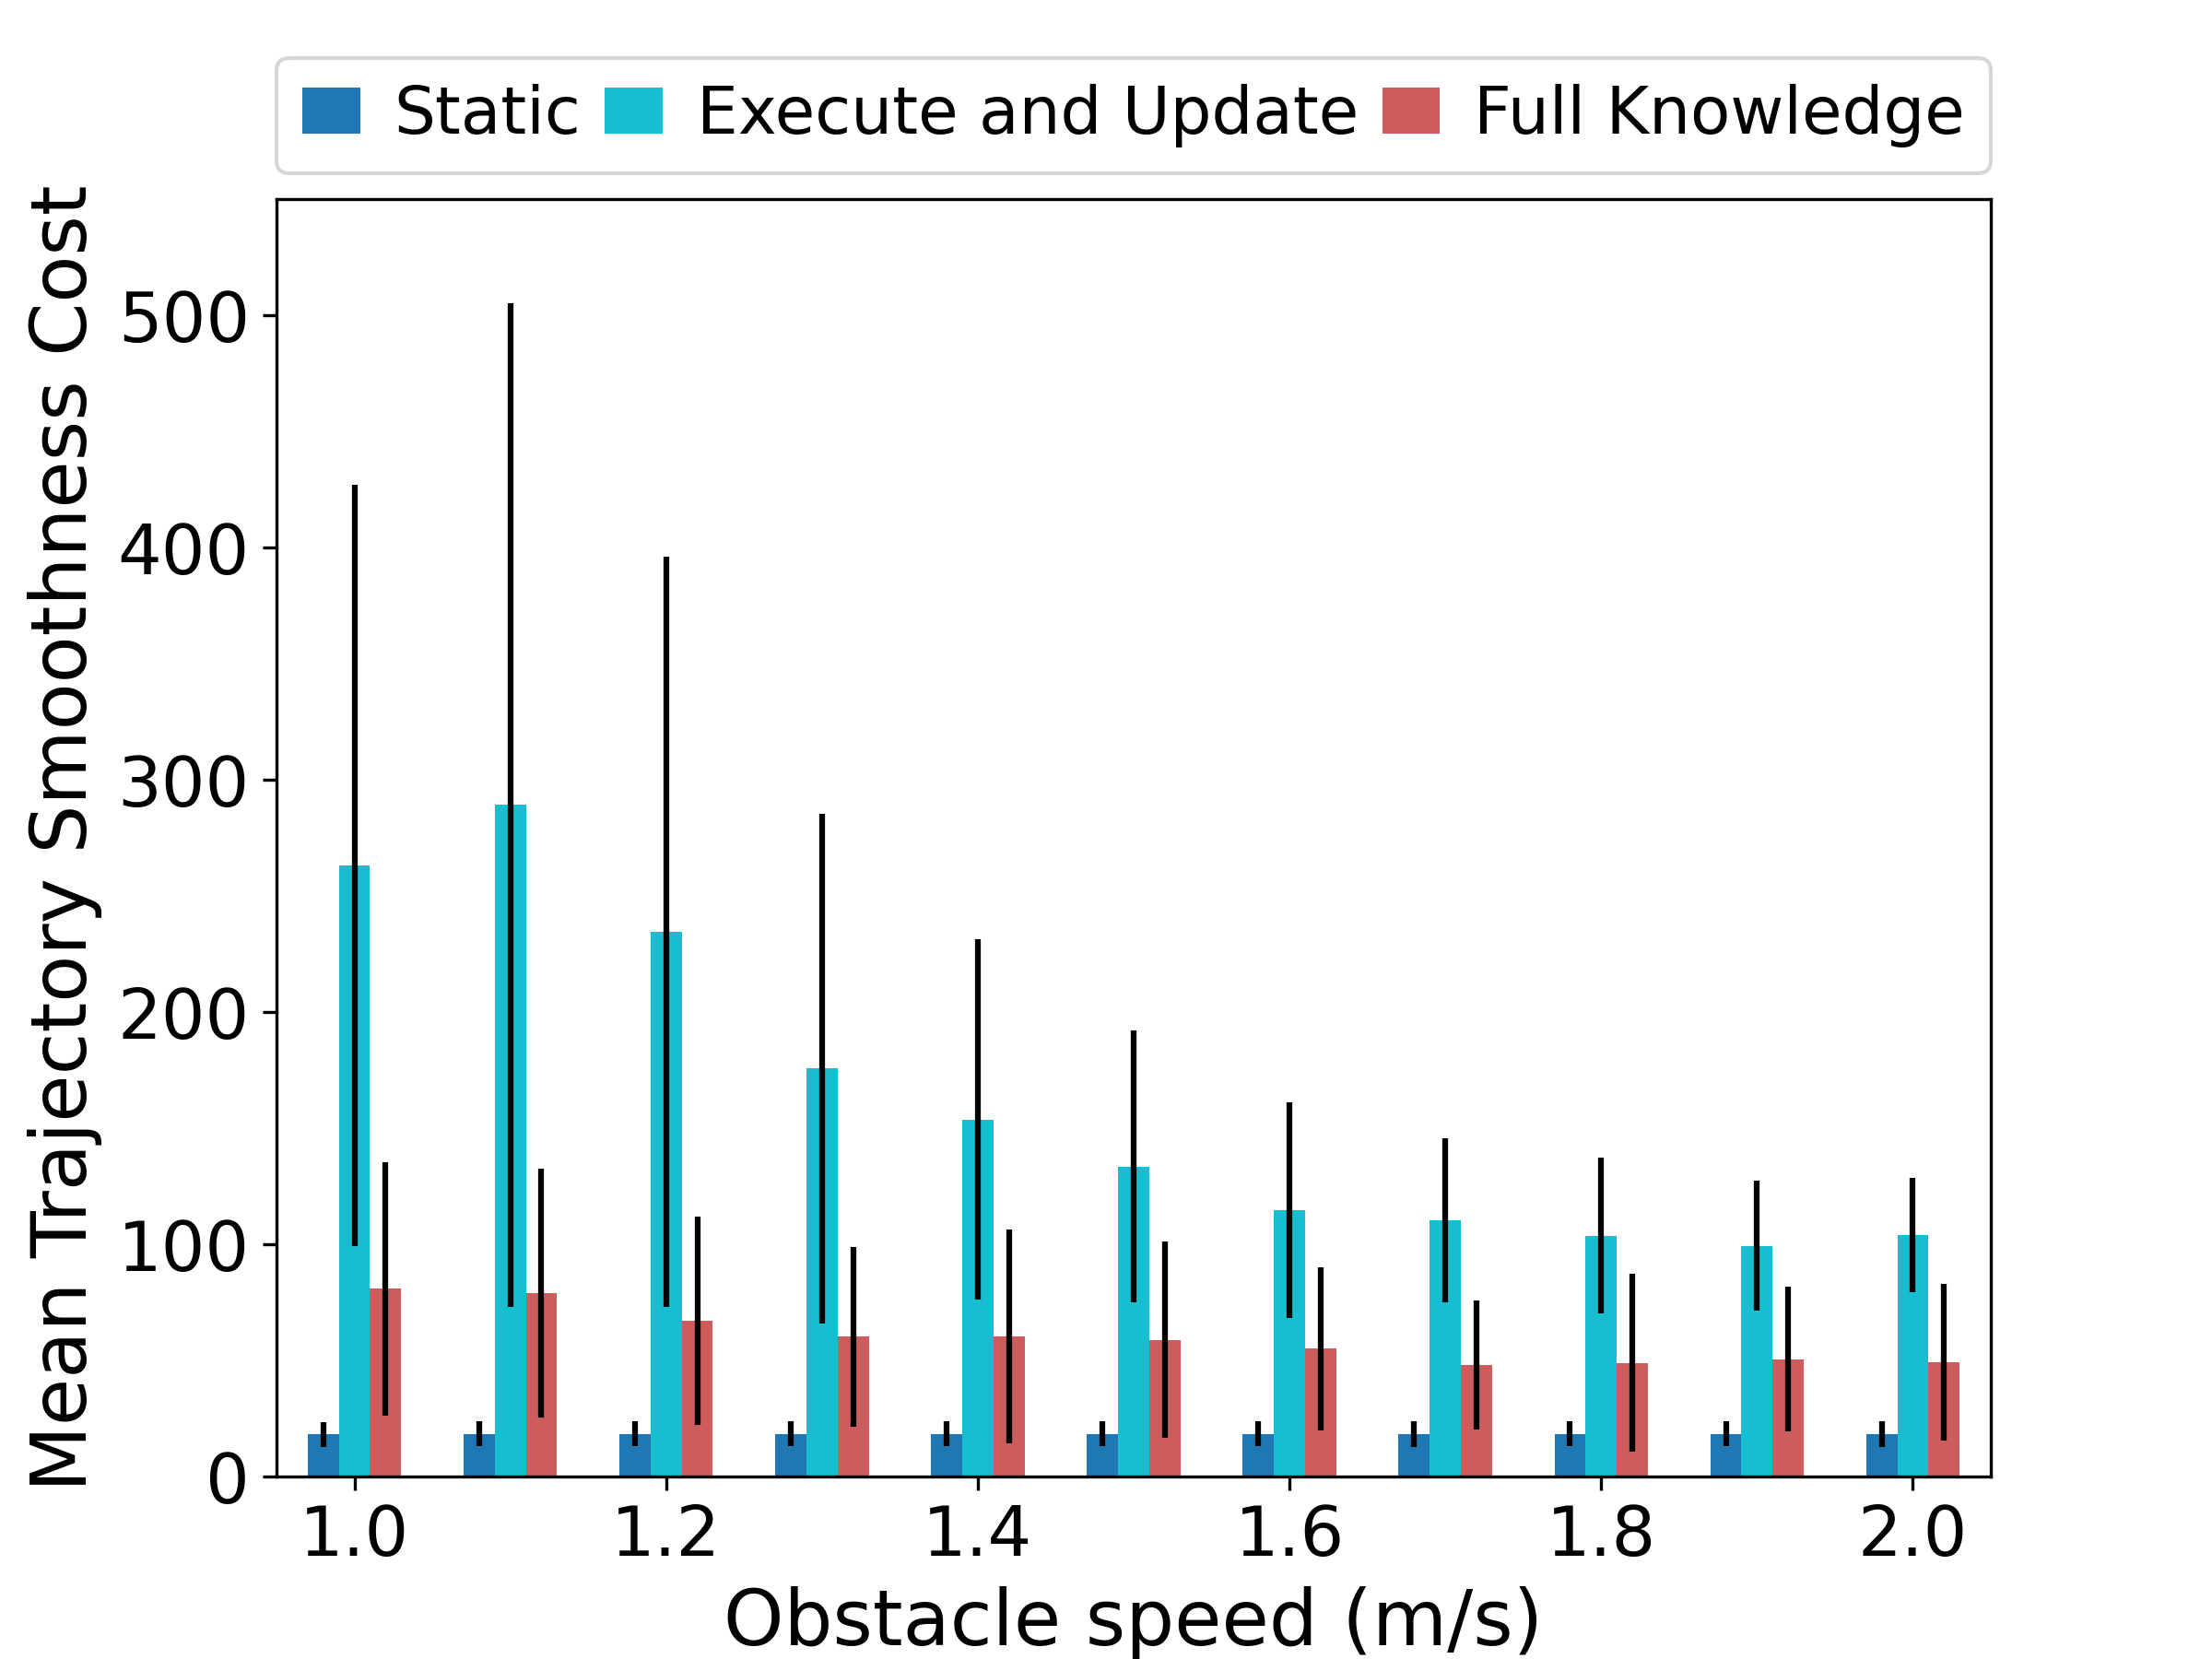

In [30]:
# speeds = (np.array(range(len(speed_static_cost)))+1)/10
speeds = np.array(df['speed'].unique())

# plt.figure(1);
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
plt.bar(speeds -0.02, 
        speed_static_gp_cost, yerr=speed_static_gp_cost_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        speed_update_gp_cost, yerr=speed_update_gp_cost_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        speed_full_gp_cost, yerr=speed_full_gp_cost_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Trajectory Smoothness Cost", fontsize=20)
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.ylim([0,550])
plt.xlim([0.95,2.05])
plt.savefig('HSRExperiment_SpeedVsMeanTrajGPCost_CF.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


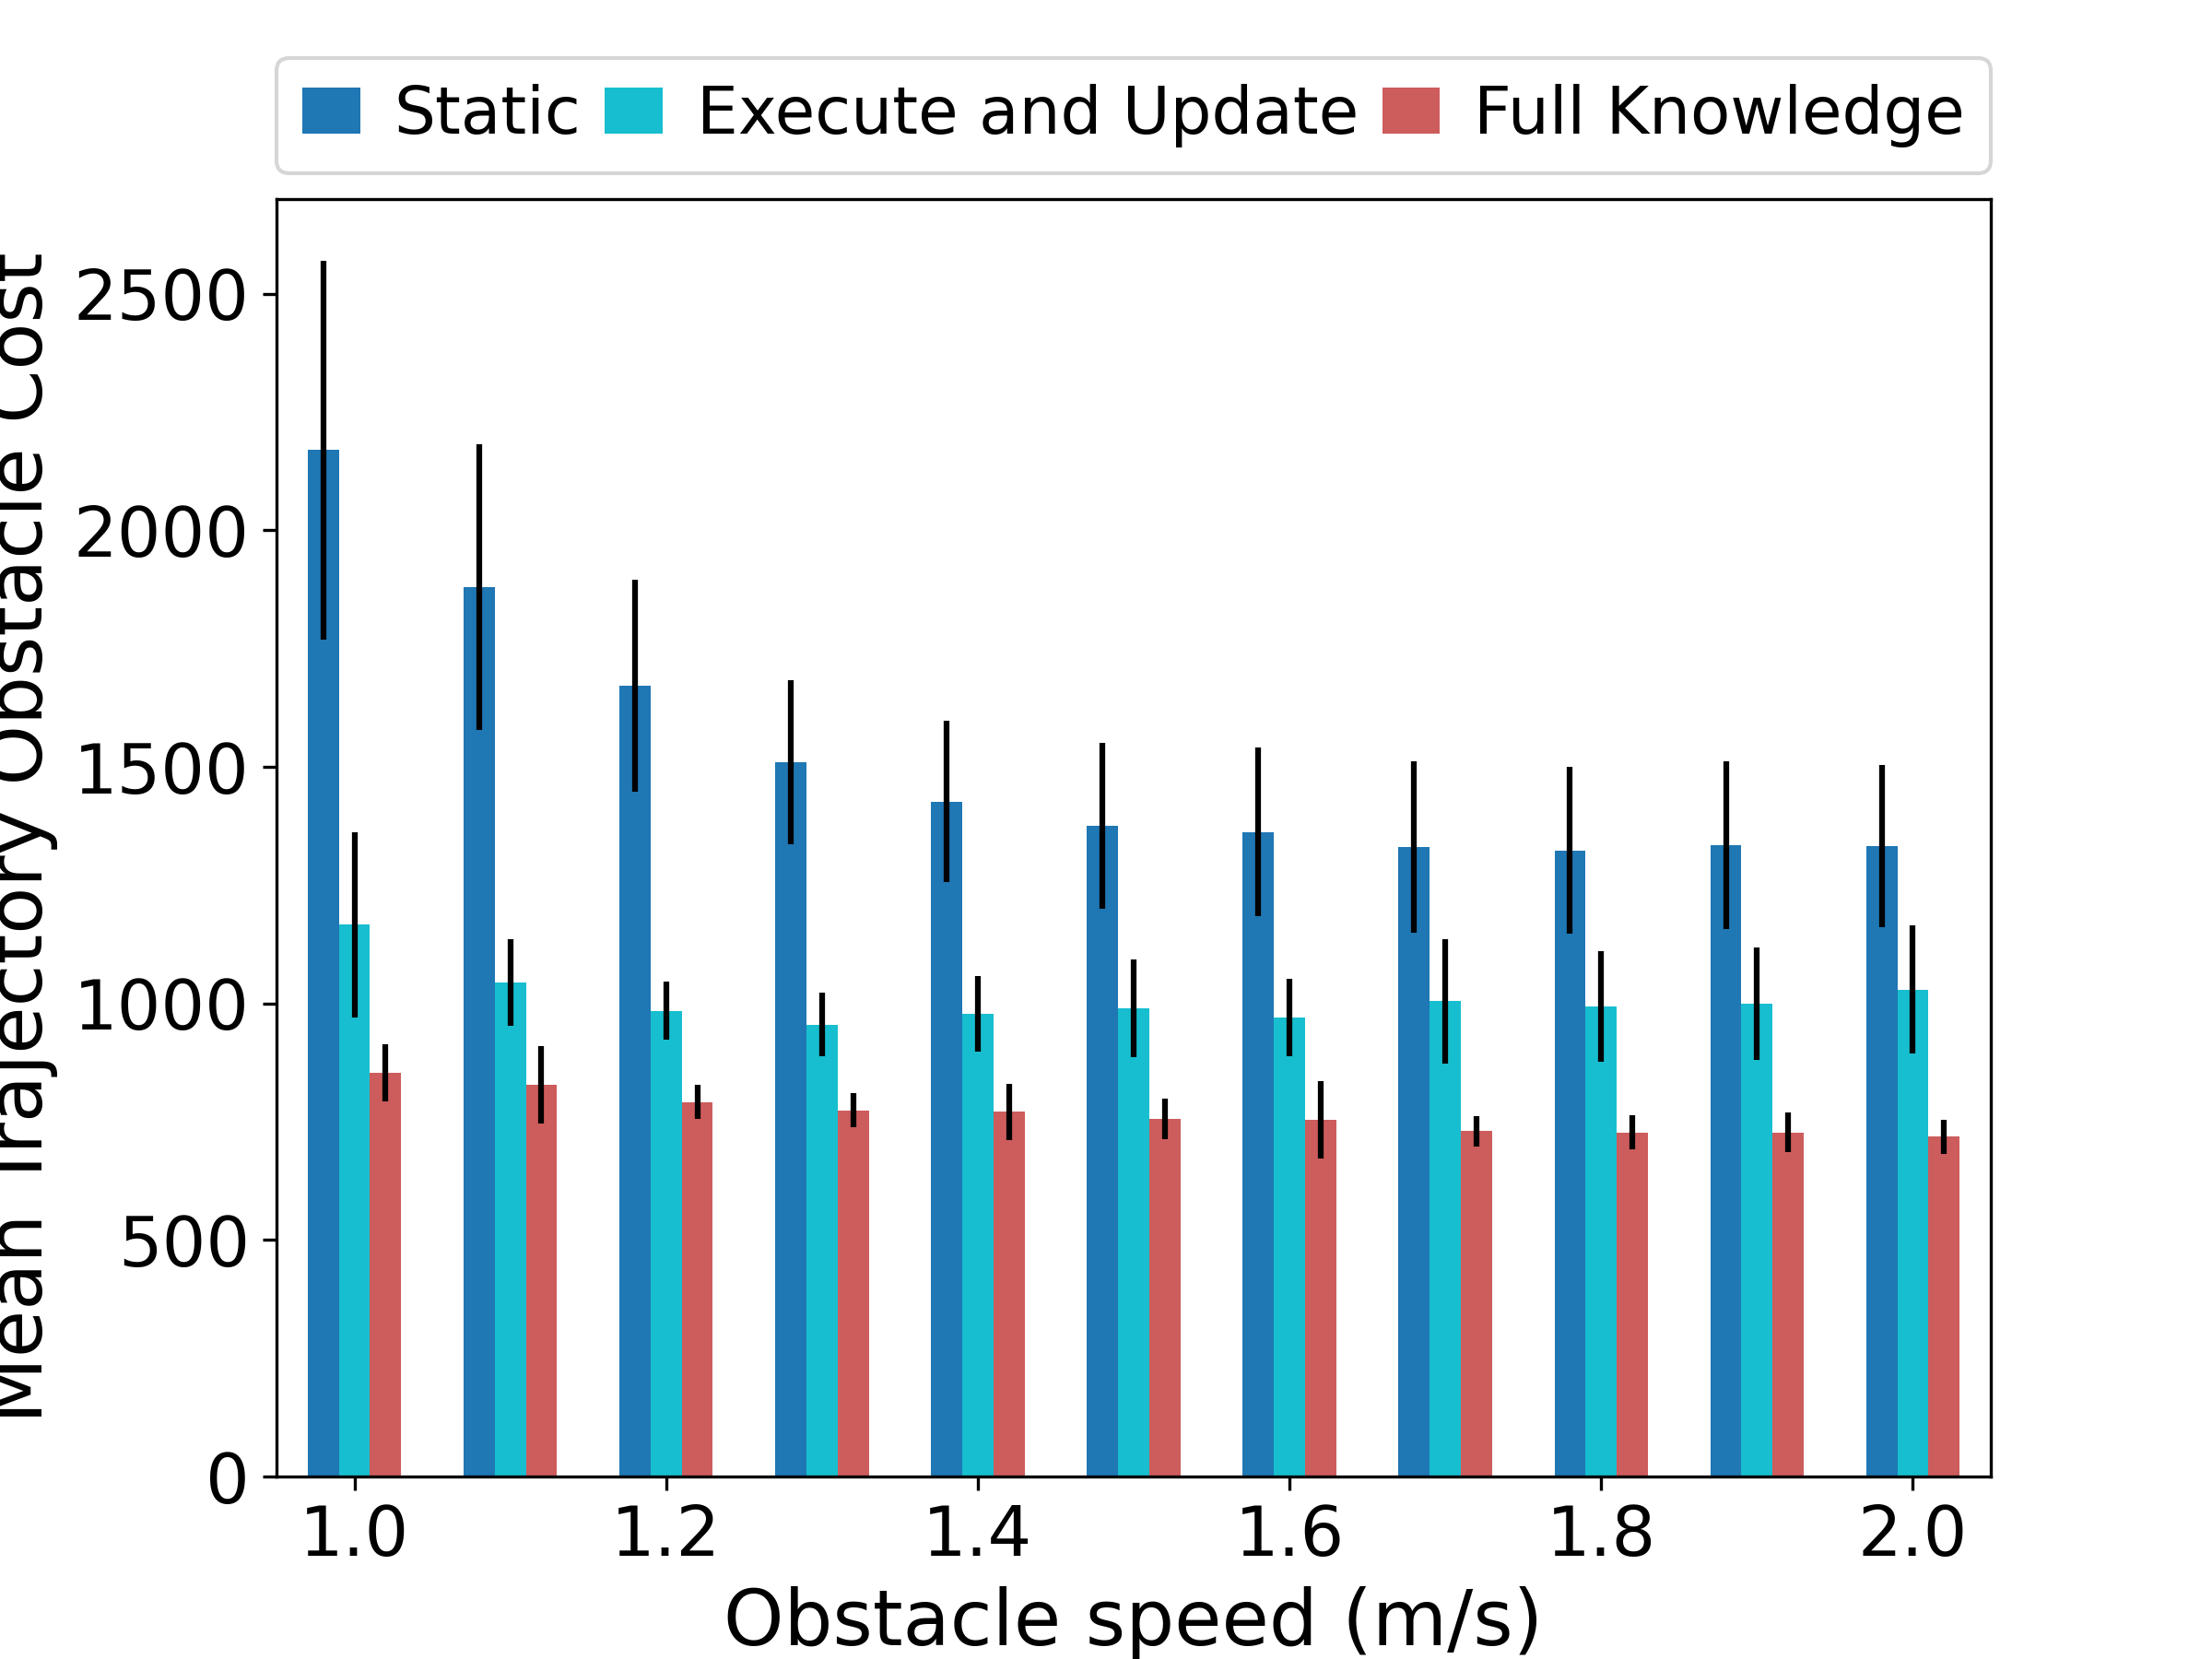

In [31]:
# speeds = (np.array(range(len(speed_static_cost)))+1)/10
speeds = np.array(df['speed'].unique())

# plt.figure(2);
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
plt.bar(speeds -0.02, 
        speed_static_obs_cost, yerr=speed_static_obs_cost_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        speed_update_obs_cost, yerr=speed_update_obs_cost_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        speed_full_obs_cost, yerr=speed_full_obs_cost_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Trajectory Obstacle Cost", fontsize=20)
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.ylim([0,2700])
plt.xlim([0.95, 2.05])
plt.savefig('HSRExperiment_SpeedVsMeanTrajObstacleCost_CF.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


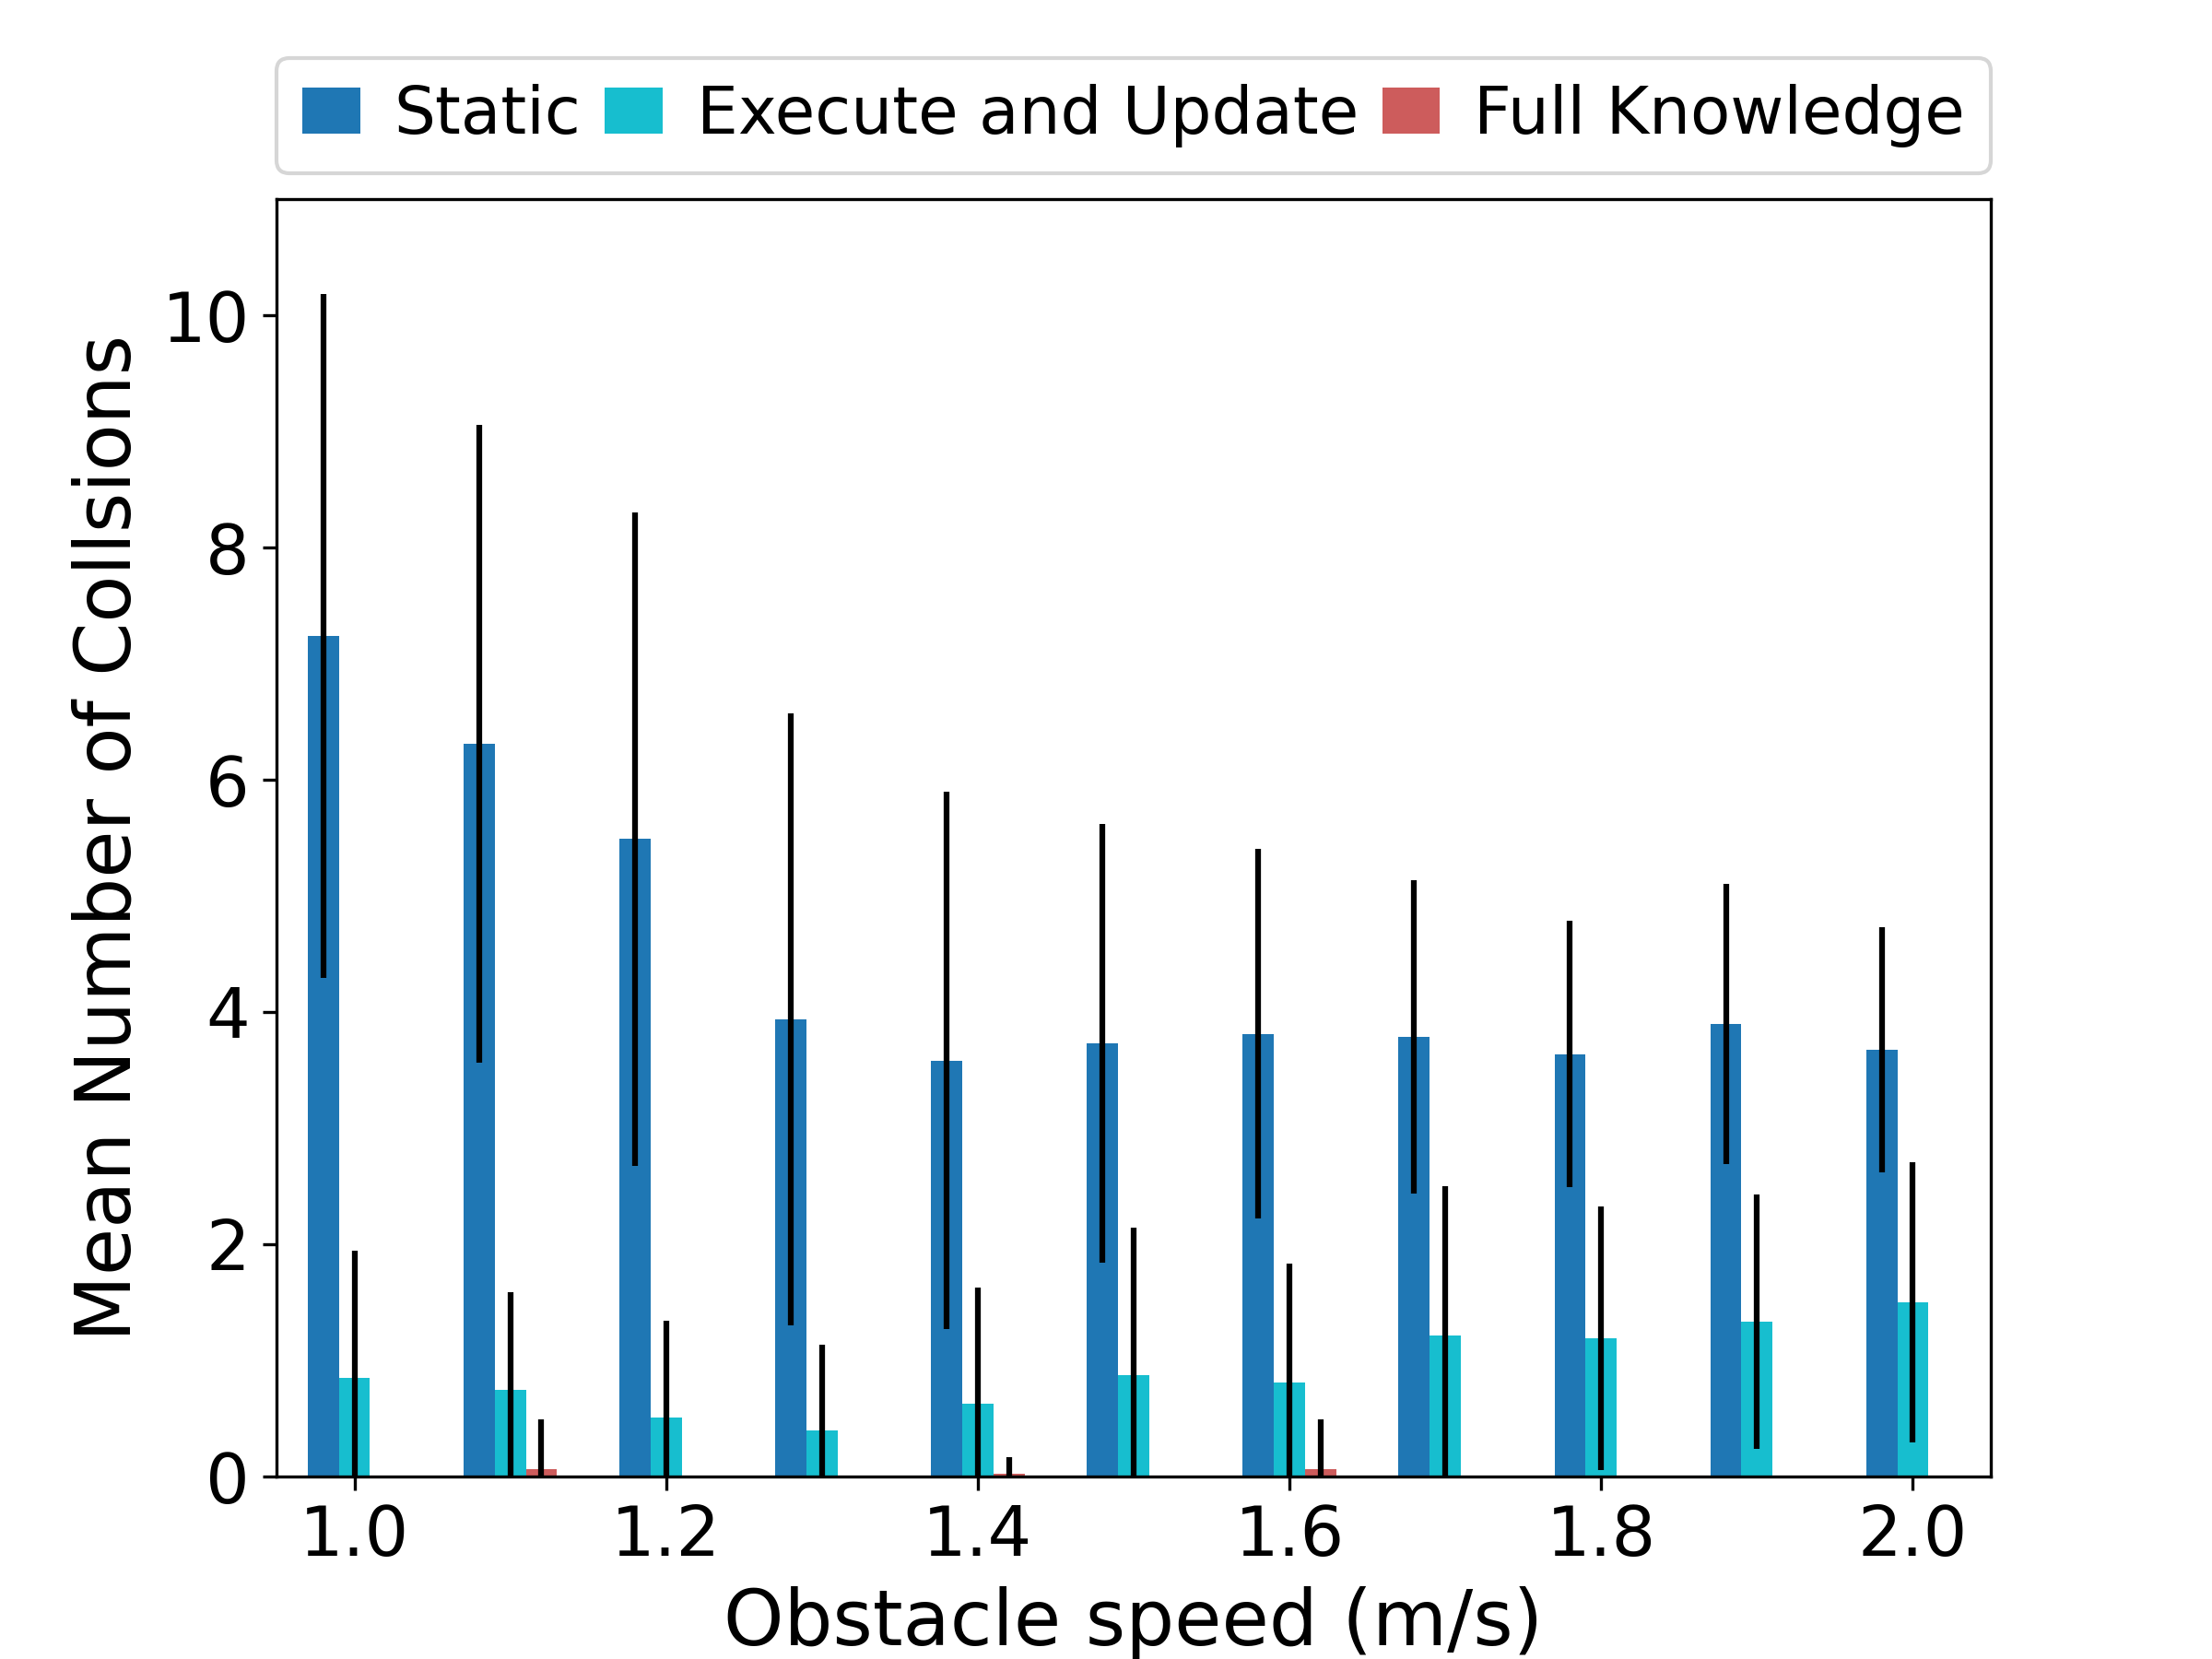

In [32]:
# plt.figure(4);
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
plt.bar(speeds -0.02, speed_static_cols, yerr=speed_static_cols_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, speed_update_cols, yerr=speed_update_cols_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds + 0.02, speed_full_cols, yerr=speed_full_cols_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Number of Collsions", fontsize=20)
# plt.ylim([0,15])
plt.ylim([0,11])
plt.xlim([0.95,2.05])
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.savefig('HSRExperiment_SpeedVsMeanCollsions_CF.png', dpi=300)

plt.show()

<IPython.core.display.Javascript object>


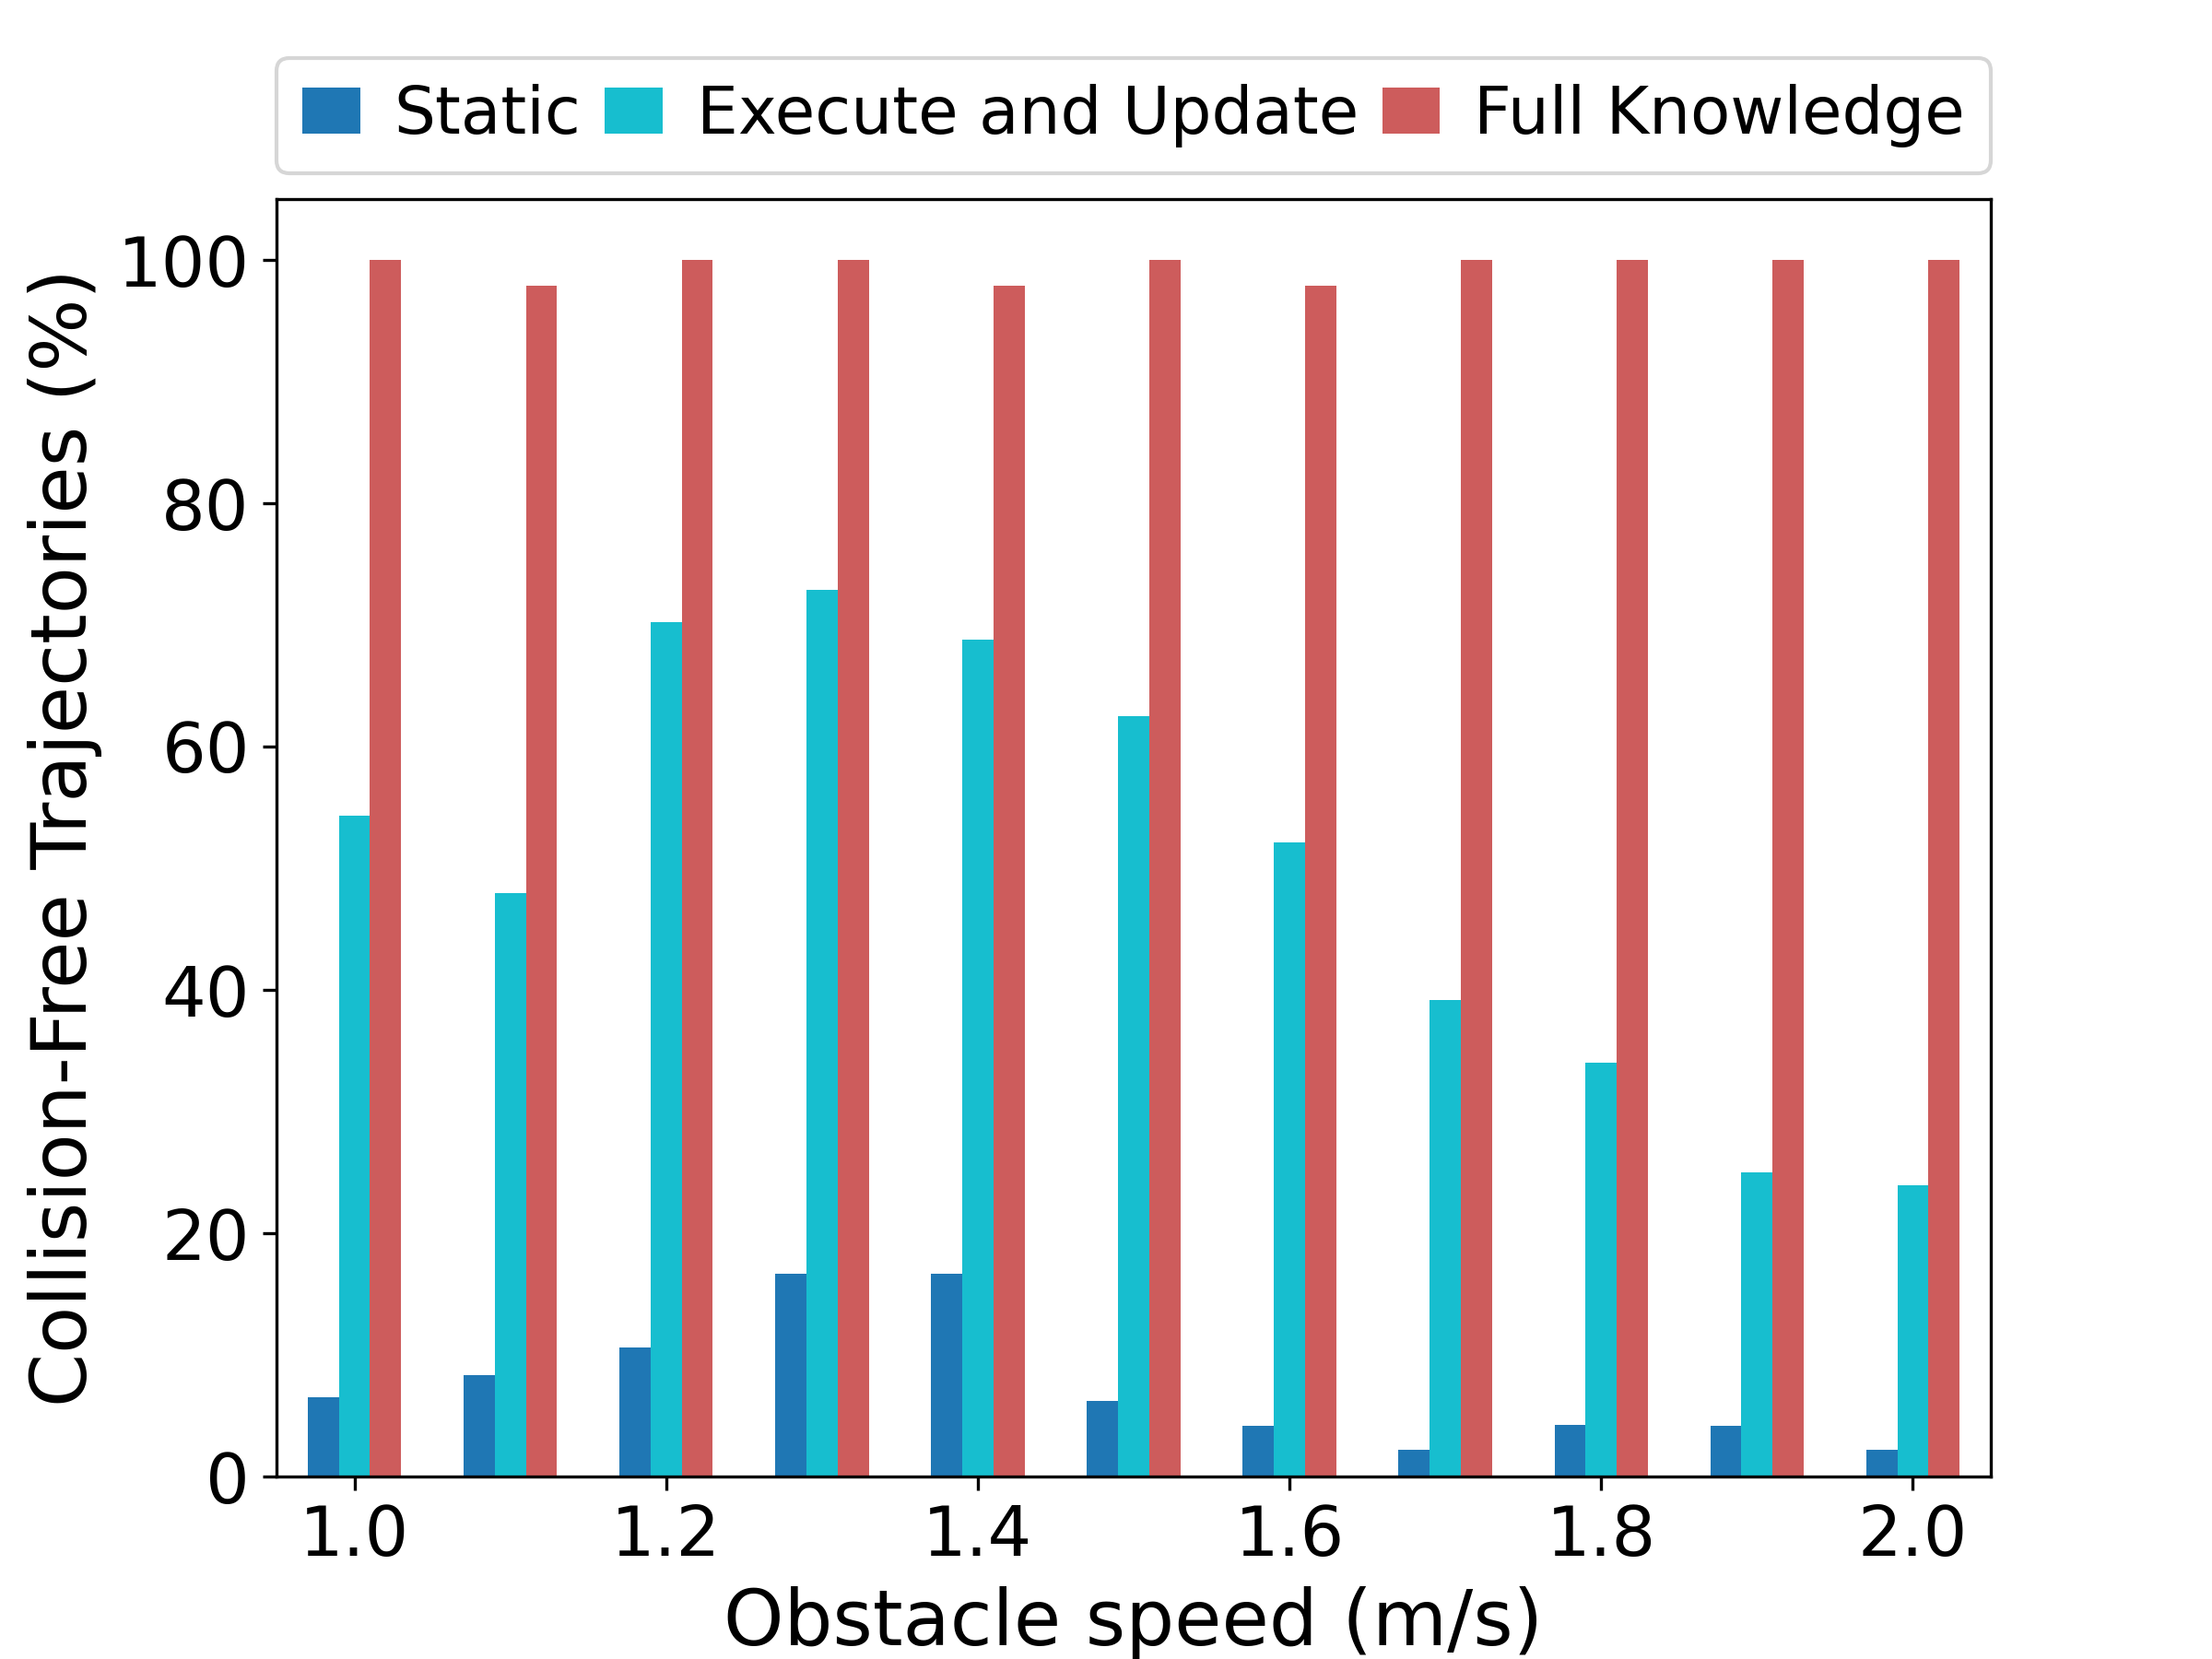

In [34]:
# plt.figure(5);
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
plt.bar(speeds -0.02, 
        static_col_free_ratio*100, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        update_col_free_ratio*100, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        full_col_free_ratio*100, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Collision-Free Trajectories (%)", fontsize=20)
plt.xlim([0.95,2.05])
# plt.xticks(np.arange(1.1,2.05,step=0.2))
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.savefig('HSRExperiment_SpeedVsColFree_CF.png', dpi=300)
plt.show()

In [25]:
for handle in leg.legendHandles:
    handle.set_width(20.0)